# Laboratorio 2 Expresiones Regulares


El objetivo de las expresiones regulares (también conocidas como regex) en Python es proporcionar una herramienta poderosa para buscar, manipular y trabajar con cadenas de texto de manera flexible y eficiente. Con las expresiones regulares, puedes realizar tareas como:

Búsqueda de patrones: Encontrar subsecuencias de texto que coincidan con un patrón específico (por ejemplo, buscar direcciones de correo electrónico o números de teléfono en un texto).

Sustitución de texto: Reemplazar partes de una cadena que coinciden con un patrón determinado por otro texto.

Validación de formato: Comprobar si una cadena sigue un formato esperado (por ejemplo, validar que un número de teléfono tenga el formato correcto o que una contraseña cumpla con requisitos específicos).

Extracción de datos: Extraer información de un texto que cumpla con un patrón específico, como extraer todas las fechas o direcciones de correo electrónico de un documento.

División de texto: Dividir una cadena en fragmentos utilizando un delimitador que coincida con un patrón.
*****************



# Cargar el Archivo
Para este laboratorio emplearemos el archivo `mbox-shot.txt` que fue empleado en el laboratorio 1. Por lo que este debe esta alojado en la carpeta correspondienteo tal y como se muestra en la siguiente figura.

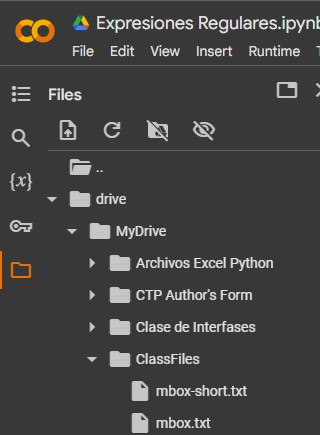

Se debe importar la librería de expresiones regulares re a tu programa antes de que puedas usarlas. La forma más simple de usar la librería de expresiones regulares es la función search() (N. del T.: “search” significa búsqueda). El siguiente programa demuestra una forma muy sencilla de usar esta función.

Para ello vamos a ejecutar la siguiente lineas de codigo

In [1]:
import re
man = open('/content/drive/MyDrive/ClassFiles/mbox-short.txt')
for linea in man:
    linea = linea.rstrip()
    if re.search('From:', linea):
        print(linea)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ClassFiles/mbox-short.txt'

Abrimos el archivo, revisamos cada línea, y usamos la expresión regular search() para imprimir solo las líneas que contengan la cadena “From”. Este programa no toma ventaja del auténtico poder de las expresiones regulares, ya que podríamos simplemente haber usado line.find() para lograr el mismo resultado.

El poder de las expresiones regulares se manifiesta cuando agregamos caracteres especiales a la cadena de búsqueda que nos permite controlar de manera más precisa qué líneas calzan con la cadena. Agregar estos caracteres especiales a nuestra expresión regular nos permitirá buscar coincidencias y extraer datos usando unas pocas líneas de código.

Por ejemplo, el signo de intercalación (N. del T.: “caret” en inglés, corresponde al signo ^) se utiliza en expresiones regulares para encontrar “el comienzo” de una lína. Podríamos cambiar nuestro programa para que solo retorne líneas en que tengan “From:” al comienzo, de la siguiente manera:

In [2]:
import re
man = open('/content/drive/MyDrive/ClassFiles/mbox-short.txt')
for linea in man:
    linea = linea.rstrip()
    if re.search('^From:', linea):
        print(linea)

From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: gsilver@umich.edu
From: gsilver@umich.edu
From: zqian@umich.edu
From: gsilver@umich.edu
From: wagnermr@iupui.edu
From: zqian@umich.edu
From: antranig@caret.cam.ac.uk
From: gopal.ramasammycook@gmail.com
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: louis@media.berkeley.edu
From: ray@media.berkeley.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu


Ahora solo retornará líneas que comiencen con la cadena “From:”. Este sigue siendo un ejemplo muy sencillo que podríamos haber implementado usando el método startswith() de la librería de cadenas. Pero sirve para presentar la idea de que las expresiones regulares contienen caracteres especiales que nos dan mayor control sobre qué coincidencias retornará la expresión regular.
***************

# Coincidencia de caracteres en expresiones regulares

Existen varios caracteres especiales que nos permiten construir expresiones regulares incluso más poderosas. El más común es el punto, que coincide con cualquier carácter.


En el siguiente ejemplo, la expresión regular F..m: coincidiría con las cadenas “From:”, “Fxxm:”, “F12m:”, o “F!@m:”, ya que los caracteres de punto en la expresión regular coinciden con cualquier carácter.

In [4]:
# # Búsqueda de líneas que comiencen con 'F', seguidas de
# 2 caracteres, seguidos de 'm:'
import re
man = open('/content/drive/MyDrive/ClassFiles/mbox-short.txt')
for linea in man:
    linea = linea.rstrip()
    if re.search('^F..m:', linea):
        print(linea)

From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: gsilver@umich.edu
From: gsilver@umich.edu
From: zqian@umich.edu
From: gsilver@umich.edu
From: wagnermr@iupui.edu
From: zqian@umich.edu
From: antranig@caret.cam.ac.uk
From: gopal.ramasammycook@gmail.com
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: louis@media.berkeley.edu
From: ray@media.berkeley.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu


Esto resulta particularmente poderoso cuando se le combina con la habilidad de indicar que un carácter puede repetirse cualquier cantidad de veces usando los caracteres * o + en tu expresión regular. Estos caracteres especiales indican que en lugar de coincidir con un solo carácter en la cadena de búsqueda, coinciden con cero o más caracteres (en el caso del asterisco) o con uno o más caracteres (en el caso del signo de suma).

Podemos reducir más las líneas que coincidan usando un carácter comodín en el siguiente ejemplo:

In [5]:
import re
man = open('/content/drive/MyDrive/ClassFiles/mbox-short.txt')
for linea in man:
    linea = linea.rstrip()
    if re.search('^From:.+@', linea):
        print(linea)

From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: gsilver@umich.edu
From: gsilver@umich.edu
From: zqian@umich.edu
From: gsilver@umich.edu
From: wagnermr@iupui.edu
From: zqian@umich.edu
From: antranig@caret.cam.ac.uk
From: gopal.ramasammycook@gmail.com
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: louis@media.berkeley.edu
From: ray@media.berkeley.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu


La cadena ^From:.+@ retornará coincidencias con líneas que empiecen con “From:”, seguidas de uno o más caracteres (.+), seguidas de un carácter @. Por lo tanto, la siguiente línea coincidirá:

> From: stephen.marquard@uct.ac.za

Puede considerarse que el comodín .+ se expande para abarcar todos los caracteres entre los signos : y @.

>From:.+@

Conviene considerar que los signos de suma y los asteriscos “empujan”. Por ejemplo, la siguiente cadena marcaría una coincidencia con el último signo @, ya que el .+ “empujan” hacia afuera, como se muestra a continuación:

> From: stephen.marquard@uct.ac.za, csev@umich.edu, and cwen @iupui.edu

**************






# Extrayendo datos usando expresiones regulares

Si queremos extraer datos de una cadena en Python podemos usar el método findall() para extraer todas las subcadenas que coincidan con una expresión regular. Usemos el ejemplo de querer extraer cualquier secuencia que parezca una dirección email en cualquier línea, sin importar su formato. Por ejemplo, queremos extraer la dirección email de cada una de las siguientes líneas:


> From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008
Return-Path: <postmaster@collab.sakaiproject.org>
          for <source@collab.sakaiproject.org>;
Received: (from apache@localhost)
Author: stephen.marquard@uct.ac.za

No queremos escribir código para cada tipo de líneas, dividiendo y rebanando de manera distinta en cada una. El siguiente programa usa findall() para encontrar las líneas que contienen direcciones de email y extraer una o más direcciones de cada línea.



In [6]:
import re
s = 'Una nota de csev@umich.edu a cwen@iupui.edu sobre una reunión @ 2PM'
lst = re.findall(r'\S+@\S+', s)
print(lst)

['csev@umich.edu', 'cwen@iupui.edu']


El método findall() busca en la cadena en el segundo argumento y retorna una lista de todas las cadenas que parecen ser direcciones de email. Estamos usando una secuencia de dos caracteres que coincide con un carácter distinto a un espacio en blanco (\S).

El resultado de la ejecución del programa debiera ser:

> ['csev@umich.edu', 'cwen@iupui.edu']



Traduciendo la expresión regular al castellano, estamos buscando subcadenas que tengan al menos un carácter que no sea un espacio, seguido de una @, seguido de al menos un carácter que no sea un espacio. La expresión \S+ coincidirá con cuantos caracteres distintos de un espacio sea posible.

La expresión regular retornaría dos coincidencias (csev@umich.edu y cwen@iupui.edu), pero no coincidiría con la cadena “@2PM” porque no hay caracteres que no sean espacios en blanco antes del signo @. Podemos usar esta expresión regular en un programa para leer todas las líneas en un archivo e imprimir cualquier subcadena que pudiera ser una dirección de email de la siguiente manera:

In [8]:
# Búsqueda de líneas que tengan una arroba entre caracteres
import re
man = open('/content/drive/MyDrive/ClassFiles/mbox-short.txt')
for linea in man:
    linea = linea.rstrip()
    x = re.findall(r'\S+@\S+', linea)
    if len(x) > 0:
        print(x)

['stephen.marquard@uct.ac.za']
['<postmaster@collab.sakaiproject.org>']
['<200801051412.m05ECIaH010327@nakamura.uits.iupui.edu>']
['<source@collab.sakaiproject.org>;']
['<source@collab.sakaiproject.org>;']
['<source@collab.sakaiproject.org>;']
['apache@localhost)']
['source@collab.sakaiproject.org;']
['stephen.marquard@uct.ac.za']
['source@collab.sakaiproject.org']
['stephen.marquard@uct.ac.za']
['stephen.marquard@uct.ac.za']
['louis@media.berkeley.edu']
['<postmaster@collab.sakaiproject.org>']
['<200801042308.m04N8v6O008125@nakamura.uits.iupui.edu>']
['<source@collab.sakaiproject.org>;']
['<source@collab.sakaiproject.org>;']
['<source@collab.sakaiproject.org>;']
['apache@localhost)']
['source@collab.sakaiproject.org;']
['louis@media.berkeley.edu']
['source@collab.sakaiproject.org']
['louis@media.berkeley.edu']
['louis@media.berkeley.edu']
['zqian@umich.edu']
['<postmaster@collab.sakaiproject.org>']
['<200801042109.m04L92hb007923@nakamura.uits.iupui.edu>']
['<source@collab.sakaiproject

Con esto, leemos cada línea y luego extraemos las subcadenas que coincidan con nuestra expresión regular. Dado que findall() retorna una lista, simplemente revisamos si el número de elementos en ésta es mayor a cero e imprimir solo líneas donde encontramos al menos una subcadena que pudiera ser una dirección de email.

Si ejecutamos el programa en mbox.txt obtendremos el siguiente resultado:


> ['wagnermr@iupui.edu']
['cwen@iupui.edu']
['<postmaster@collab.sakaiproject.org>']
['<200801032122.m03LMFo4005148@nakamura.uits.iupui.edu>']
['<source@collab.sakaiproject.org>;']
['<source@collab.sakaiproject.org>;']
['<source@collab.sakaiproject.org>;']
['apache@localhost)']
['source@collab.sakaiproject.org;']






Algunas de las direcciones tienen caracteres incorrectos como “<” o “;” al comienzo o al final. Declaremos que solo estamos interesados en la parte de la cadena que comience y termine con una letra o un número.

Para lograr esto, usamos otra característica de las expresiones regulares. Los corchetes se usan para indicar un conjunto de caracteres que queremos aceptar como coincidencias. La secuencia \S retornará el conjunto de “caracteres que no sean un espacio en blanco”. Ahora seremos un poco más explícitos en cuanto a los caracteres respecto de los cuales buscamos coincidencias.

Esta será nuestra nueva expresión regular:



> [a-zA-Z0-9]\S*@\S*[a-zA-Z]



Esto se está complicando un poco; puedes ver por qué decimos que las expresiones regulares son un lenguaje en sí mismas. Traduciendo esta expresión regular, estamos buscando subcadenas que comiencen con una letra minúscula, letra mayúscula, o número “[a-zA-Z0-9]”, seguida de cero o más caracteres que no sean un espacio (\S*), seguidos de un signo @, seguido de cero o más caracteres que no sean espacios en blanco (\S*), seguidos por una letra mayúscula o minúscula. Nótese que hemos cambiado de + a * para indicar cero o más caracteres que no sean espacios, ya que [a-zA-Z0-9] implica un carácter distinto de un espacio. Recuerda que el * o + se aplica al carácter inmediatamente a la izquierda del signo de suma o del asterisco.

Si usamos esta expresión en nuestro programas, nuestros datos quedarán mucho más depurados:

In [9]:
# Búsqueda de líneas que tengan una arroba entre caracteres
# Los caracteres deben ser una letra o un número
import re
man = open('/content/drive/MyDrive/ClassFiles/mbox-short.txt')
for linea in man:
    linea = linea.rstrip()
    x = re.findall(r'[a-zA-Z0-9]\S+@\S+[a-zA-Z]', linea)
    if len(x) > 0:
        print(x)

['stephen.marquard@uct.ac.za']
['postmaster@collab.sakaiproject.org']
['200801051412.m05ECIaH010327@nakamura.uits.iupui.edu']
['source@collab.sakaiproject.org']
['source@collab.sakaiproject.org']
['source@collab.sakaiproject.org']
['apache@localhost']
['source@collab.sakaiproject.org']
['stephen.marquard@uct.ac.za']
['source@collab.sakaiproject.org']
['stephen.marquard@uct.ac.za']
['stephen.marquard@uct.ac.za']
['louis@media.berkeley.edu']
['postmaster@collab.sakaiproject.org']
['200801042308.m04N8v6O008125@nakamura.uits.iupui.edu']
['source@collab.sakaiproject.org']
['source@collab.sakaiproject.org']
['source@collab.sakaiproject.org']
['apache@localhost']
['source@collab.sakaiproject.org']
['louis@media.berkeley.edu']
['source@collab.sakaiproject.org']
['louis@media.berkeley.edu']
['louis@media.berkeley.edu']
['zqian@umich.edu']
['postmaster@collab.sakaiproject.org']
['200801042109.m04L92hb007923@nakamura.uits.iupui.edu']
['source@collab.sakaiproject.org']
['source@collab.sakaiproject

Nótese que en las líneas donde aparece source@collab.sakaiproject.org, nuestra expresión regular eliminó dos caracteres al final de la cadena (“>;”). Esto se debe a que, cuando agregamos [a-zA-Z] al final de nuestra expresión regular, estamos determinando que cualquier cadena que la expresión regular encuentre al analizar el texto debe terminar con una letra. Por lo tanto, cuando vea el “>” al final de “sakaiproject.org>;”, simplemente se detiene en el último carácter que haya encontrado que coincida con ese criterio (en este caso, la “g” fue la última coincidencia).

Nótese también que el resultado de la ejecución del programa es una lista de Python que tiene una cadena como su único elemento.
*************

# Combinando búsqueda y extracción

Si quisiéramos encontrar los números en las líneas que empiecen con la cadena “X-”, como por ejemplo:

> X-DSPAM-Confidence: 0.8475

> X-DSPAM-Probability: 0.0000

no queremos cualquier número de coma flotante contenidos en cualquier línea. Solo queremos extraer los números de las líneas que tienen la sintaxis ya mencionada.

Podemos construir la siguiente expresión regular para seleccionar las líneas:


> ^X-.*: [0-9.]+

Traduciendo esto, estamos diciendo que queremos líneas que empiecen con X-, seguido por cero o más caracteres (.*), seguido por un carácter de dos puntos (:) y luego un espacio. Después del espacio, buscamos uno o más caracteres que sean, o bien un dígito (0-9), o bien un punto [0-9.]+. Nótese que al interior de los corchetes el punto efectivamente corresponde a un punto (es decir, no funciona como comodín entre corchetes).

La siguiente es una expresión bastante comprimida que solo retornará las líneas que nos interesan:







In [10]:
# Búsqueda de líneas que comiencen con 'X' seguida de cualquier caracter que
# no sea espacio y ':' seguido de un espacio y cualquier número.
# El número incluye decimales.
import re
man = open('/content/drive/MyDrive/ClassFiles/mbox-short.txt')
for linea in man:
    linea = linea.rstrip()
    if re.search(r'^X\S*: [0-9.]+', linea):
        print(linea)


X-DSPAM-Confidence: 0.8475
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.6178
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.6961
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.7565
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.7626
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.7556
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.7002
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.7615
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.7601
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.7605
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.6959
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.7606
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.7559
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.7605
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.6932
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.7558
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.6526
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.6948
X-DSPAM-Probability: 0.0000
X-DSPAM-Co

Ahora, debemos resolver el problema de extraer los númueros. Aunque sería bastante sencillo usar split, podemos echar mano a otra función de las expresiones regulares para buscar y analizar la línea a la vez.

Los paréntesis son otros caracteres especiales en las expresiones regulares. Al agregar paréntesis a una expresión regular, son ignorados a la hora de hacer coincidir la cadena. Pero cuando se usa findall(), los paréntesis indican que, aunque se quiere que toda la expresión coincida, solo interesa extraer una parte de la subcadena que coincida con la expresión regular.


Entonces, hacemos los siguientes cambios a nuestro programa:

In [1]:
# Búsqueda de líneas que comiencen con 'X' seguida de cualquier caracter que
# no sea espacio en blanco y ':' seguido de un espacio y un número.
# El número puede incluir decimales.
# Después imprimir el número si es mayor a cero.
import re
man = open('/content/drive/MyDrive/ClassFiles/mbox-short.txt')
for linea in man:
    linea = linea.rstrip()
    x = re.findall(r'^X\S*: ([0-9.]+)', linea)
    if len(x) > 0:
        print(x)


['0.8475']
['0.0000']
['0.6178']
['0.0000']
['0.6961']
['0.0000']
['0.7565']
['0.0000']
['0.7626']
['0.0000']
['0.7556']
['0.0000']
['0.7002']
['0.0000']
['0.7615']
['0.0000']
['0.7601']
['0.0000']
['0.7605']
['0.0000']
['0.6959']
['0.0000']
['0.7606']
['0.0000']
['0.7559']
['0.0000']
['0.7605']
['0.0000']
['0.6932']
['0.0000']
['0.7558']
['0.0000']
['0.6526']
['0.0000']
['0.6948']
['0.0000']
['0.6528']
['0.0000']
['0.7002']
['0.0000']
['0.7554']
['0.0000']
['0.6956']
['0.0000']
['0.6959']
['0.0000']
['0.7556']
['0.0000']
['0.9846']
['0.0000']
['0.8509']
['0.0000']
['0.9907']
['0.0000']


Si quisiéramos extraer todos los números de revisión (el número entero al final de esas líneas) usando la misma técnica del ejemplo anterior, podríamos escribir el siguiente programa:

In [2]:
# Búsqueda de líneas que comiencen con 'Details: rev='
# seguido de números y '.'
# Después imprimir el número si es mayor a cero
import re
man = open('/content/drive/MyDrive/ClassFiles/mbox-short.txt')
for linea in man:
    linea = linea.rstrip()
    x = re.findall('^Details:.*rev=([0-9.]+)', linea)
    if len(x) > 0:
        print(x)


['39772']
['39771']
['39770']
['39769']
['39766']
['39765']
['39764']
['39763']
['39762']
['39761']
['39760']
['39759']
['39758']
['39757']
['39756']
['39755']
['39754']
['39753']
['39752']
['39751']
['39750']
['39749']
['39746']
['39745']
['39744']
['39743']
['39742']


Recuerda que la expresión [0-9]+ es “ambiciosa” e intentará formar una cadena de dígitos lo más larga posible antes de extraerlos. Este comportamiento “ambicioso” es la razón por la que obtenemos los cinco dígitos de cada número. La expresiones regular se expande en ambas direcciones hasta que encuentra, o bien un carácter que no sea un dígito, o bien el comienzo o final de una línea.

# Resumen

Aunque solo hemos escarbado la superficie de las expresiones regulares, hemos aprendido un poco sobre su lenguaje. Son cadenas de búsqueda con caracteres especiales en su interior, los que comunican tus deseos al sistema de expresiones regulares respecto de qué se considera una coincidencia y qué información es extraída de las cadenas coincidentes. A continuación tenemos algunos de estos caracteres y secuencias especiales:



> ^ Coincide con el comienzo de la línea.

> $ Coincide con el final de la línea

> . Coincide con cualquier carácter (un comodín).

> \s Coincide con un espacio en blanco.

> \S Coincide con un carácter que no sea un espacio en blanco (el opuesto a \s).

> * Se aplica al carácter o caracteres inmediatamente anteriores, indicando que pueden coincidir cero o más veces.

> *? Se aplica al carácter o caracteres inmediatamente anteriores, indicando que coinciden cero o más veces en modo “no ambicioso”.

> + Se aplica al carácter o caracteres inmediatamente anteriores, indicando que pueden coincidir una o más veces.

> +? Se aplica al carácter o caracteres inmediatamente anteriores, indicando que pueden coincidir una o más veces en modo “no ambicioso”.

> ? Se aplica al carácter o caracteres inmediatamente anteriores, indicando que puede coincidir cero o una vez.

> ?? Se aplica al carácter o caracteres inmediatamente anteriores, indicando que puede coincidir cero o una vez en modo “no ambicioso”.

> [aeiou] Coincide con un solo carácter, siempre que éste se encuentre dentro del conjunto especificado. En este caso, coincidiría con “a”, “e”, “i”, “o”, o “u”, pero no con otros caracteres.

> [a-z0-9] Se pueden especificar rangos de caracteres utilizando el signo menos. En este caso, sería un solo carácter que debe ser una letra minúscula o un dígito.

> [^A-Za-z] Cuando el primer carácter en la notación del conjunto es “^”, invierte la lógica. En este ejemplo, habría coincidencia con un solo carácter que no sea una letra mayúscula o una letra minúscula.

> ( ) Cuando se agregan paréntesis a una expresión regular, son ignorados para propósitos de encontrar coincidencias, pero permiten extraer un subconjunto determinado de la cadena en que se encuentra la coincidencia, en lugar de toda la cadena como cuando se utiliza findall().

> \b Coincide con una cadena vacía, pero solo al comienzo o al final de una palabra.

> \B Concide con una cadena vacía, pero no al comienzo o al final de una palabra.

> \d Coincide con cualquier dígito decimal; equivalente al conjunto [0-9].

> \D Coincide con cualquier carácter que no sea un dígito; equivalente al conjunto [^0-9].










